In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

In [117]:
d=pd.read_csv("Regression_Data_set_Batch1.csv")
d

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


In [118]:
d.shape

(545, 13)

In [119]:
d.dtypes

price                 int64
area                  int64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking             float64
prefarea             object
furnishingstatus     object
dtype: object

In [120]:
d['mainroad'].replace(['yes','no'],[1,0],inplace=True)

In [121]:
d['guestroom'].replace(['yes','no'],[1,0],inplace=True)

In [122]:
d['basement'].replace(['yes','no'],[1,0],inplace=True)

In [123]:
d['hotwaterheating'].replace(['yes','no'],[1,0],inplace=True)

In [124]:
d['airconditioning'].replace(['yes','no'],[1,0],inplace=True)

In [125]:
d['prefarea'].replace(['yes','no'],[1,0],inplace=True)

In [126]:
d['furnishingstatus'].replace(['furnished','semi-furnished','unfurnished'],[1,2,0],inplace=True)

In [127]:
d

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,1
1,12250000,8960,4.0,4.0,4.0,1,0,0,0,1,3.0,0,1
2,12250000,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,2
3,12215000,7500,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1
4,11410000,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,1,0,1,0,0,2.0,0,0
541,1767150,2400,3.0,1.0,1.0,0,0,0,0,0,0.0,0,2
542,1750000,3620,2.0,1.0,1.0,1,0,0,0,0,0.0,0,0
543,1750000,2910,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1


In [128]:
d.isna().sum()

price               0
area                0
bedrooms            5
bathrooms           5
stories             2
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             4
prefarea            0
furnishingstatus    0
dtype: int64

In [129]:
d['bedrooms'].fillna(d['bedrooms'].mean(),inplace=True)

In [130]:
d.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           5
stories             2
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             4
prefarea            0
furnishingstatus    0
dtype: int64

In [79]:
d1=d.fillna(round(d[['bedrooms','bathrooms','stories','parking']].mean()))

In [90]:
d1.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [80]:
d1.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.961468,1.282569,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.735386,0.500890,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.857308,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [16]:
x=d[['area']]
y=d[['price']]

In [21]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25)

In [22]:
x_train

,area
533,2400
385,3640
25,6540
452,9000
442,2684
...,...
67,7700
498,2000
529,3970
71,6000


In [23]:
y_train

,price
533,2100000
385,3570000
25,8540000
452,3150000
442,3220000
...,...
67,6895000
498,2660000
529,2275000
71,6755000


In [24]:
x_test

,area
514,3000
238,4510
538,3649
542,3620
412,2610
...,...
404,4900
496,4000
388,3650
57,9000


In [25]:
y_test

,price
514,2485000
238,4613000
538,1890000
542,1750000
412,3430000
...,...
404,3493000
496,2695000
388,3500000
57,7245000


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
pred=lr.predict(x_test)

In [45]:
lr.predict([[4000]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4285057.41150022]])

In [46]:
lr.coef_

array([[437.95224513]])

In [47]:
lr.intercept_

array([2533248.43099912])

In [48]:
lr.score(x_test,y_test)

0.3270583978686792

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [50]:
mean_squared_error(y_test,pred)

2134407027706.0046

In [51]:
mean_absolute_error(y_test,pred)

1128231.5785622776

In [52]:
r2_score(y_test,pred)

0.3270583978686792

<Axes: xlabel='area', ylabel='price'>

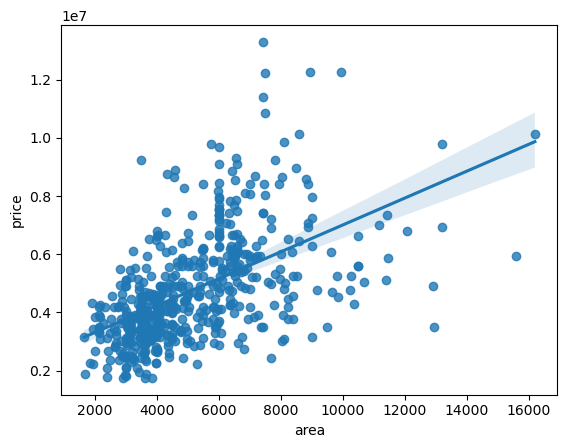

In [54]:
sns.regplot(data=d,x='area',y='price')

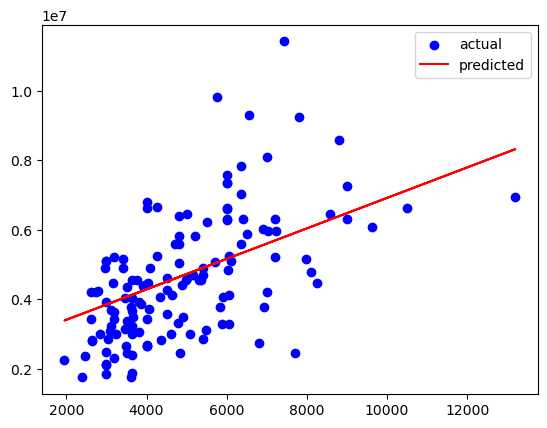

In [65]:
plt.scatter(x_test,y_test,label="actual",color='b')
plt.plot(x_test,pred,color='r',label="predicted")
plt.legend()
plt.show()

In [91]:
x1=d1[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y1=d1[['price']]

In [92]:
x1_train,x1_test,y1_train,y1_test=tts(x1,y1,test_size=0.25)

In [93]:
x1_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
536,3420,5.0,1.0,2.0,0,0,0,0,0,0.0,0,0
280,6360,2.0,1.0,2.0,1,0,0,0,0,0.0,0,0
303,4500,3.0,1.0,1.0,1,0,1,0,0,0.0,0,1
109,6615,4.0,2.0,2.0,1,1,0,1,0,1.0,0,2
390,2135,3.0,2.0,2.0,0,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
184,3000,3.0,2.0,2.0,1,1,1,0,0,0.0,0,1
348,3150,2.0,2.0,1.0,0,0,1,0,0,0.0,0,2
96,9000,3.0,1.0,1.0,1,0,1,0,0,1.0,1,1
418,3500,4.0,1.0,2.0,1,0,0,0,1,2.0,0,0


In [94]:
y1_train

,price
536,1960000
280,4270000
303,4200000
109,6090000
390,3500000
...,...
184,5110000
348,3815000
96,6300000
418,3360000


In [95]:
x1_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
326,4100,4.0,1.0,1.0,0,0,1,0,0,0.0,0,0
170,5500,3.0,2.0,1.0,1,0,1,0,0,0.0,0,2
211,12900,3.0,1.0,1.0,1,0,0,0,0,2.0,0,1
7,16200,5.0,3.0,2.0,1,0,0,0,0,0.0,0,0
203,5400,4.0,1.0,2.0,1,0,0,0,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
288,5040,3.0,1.0,2.0,1,0,1,0,1,0.0,0,0
515,3210,3.0,1.0,2.0,1,0,1,0,0,0.0,0,0
347,3350,3.0,1.0,2.0,1,0,0,0,0,0.0,0,0
481,2700,2.0,1.0,1.0,0,0,0,0,0,0.0,0,1


In [96]:
y1_test

,price
326,3990000
170,5250000
211,4900000
7,10150000
203,4900000
...,...
288,4200000
515,2450000
347,3836000
481,2940000


In [97]:
lr1=LinearRegression()

In [98]:
lr1.fit(x1_train,y1_train)

LinearRegression()

In [101]:
pred1=lr1.predict(x1_test)

In [103]:
lr1.coef_

array([[2.50453713e+02, 1.40562619e+05, 9.01601390e+05, 4.89517729e+05,
        5.59678296e+05, 1.18880595e+05, 4.50352917e+05, 8.96622688e+05,
        9.10042444e+05, 2.76371405e+05, 5.99302469e+05, 2.47988864e+05]])

In [105]:
mean_squared_error(y1_test,pred1)

988930529322.5797

In [106]:
mean_absolute_error(y1_test,pred1)

795061.465192919

In [107]:
r2_score(y1_test,pred1)

0.6857924190858986

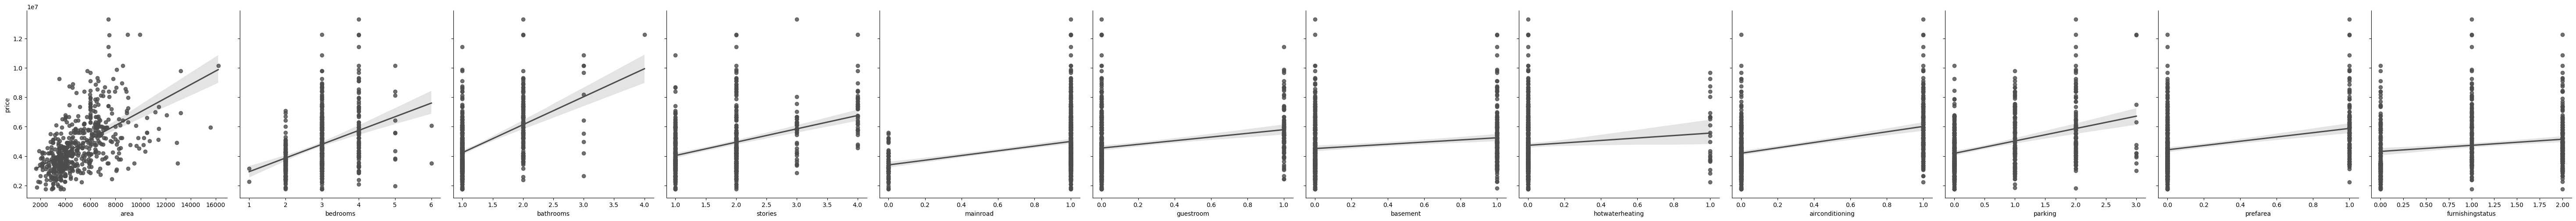

In [116]:
g=sns.PairGrid(d1,y_vars=["price"],x_vars=["area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"],height=5)
g.map(sns.regplot,color=".3")